## Final Project Submission

Please fill out:

* Student name: Nurulain Abdi Maalim

* Student pace: Part time Moringa School

* Scheduled project review date/time: Wednesday 14th December 2022

* Instructor name: Everlyne Asiko, Asha Deen, Rose Delilah and Noah Kandie

# King County  Housing Market Trends

### Objective
> In this notebook we will analyse kc_house_data.csv and come up with real estate market analysis or pricing prediction for new construction. By exploring the relationships between the different features!

I am using CRISP-DM Methodology to analyse kc_house_data

# Data Understanding

In [1]:
#Importing all the necessary libraries 
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Lets load the data on here and check a few rows to see what we are dealing with
df = pd.read_csv('Data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


### Exploratory Data Analysis

In [3]:
#lets see the features of the dataset 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
#What is the shape of our data?
df.shape

(21597, 21)

In [5]:
#What about the stats?
pd.set_option('display.float_format', lambda X : '%.5f' % X)#this helps maintain the format of the numbers on the data sets
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21597.00000,4580474287.77099,2876735715.74778,1000102.00000,2123049175.00000,3904930410.00000,7308900490.00000,9900000190.00000
price,21597.00000,540296.57351,367368.14010,78000.00000,322000.00000,450000.00000,645000.00000,7700000.00000
bedrooms,21597.00000,3.37320,0.92630,1.00000,3.00000,3.00000,4.00000,33.00000
bathrooms,21597.00000,2.11583,0.76898,0.50000,1.75000,2.25000,2.50000,8.00000
sqft_living,21597.00000,2080.32185,918.10613,370.00000,1430.00000,1910.00000,2550.00000,13540.00000
sqft_lot,21597.00000,15099.40876,41412.63688,520.00000,5040.00000,7618.00000,10685.00000,1651359.00000
floors,21597.00000,1.49410,0.53968,1.00000,1.00000,1.50000,2.00000,3.50000
waterfront,19221.00000,0.00760,0.08682,0.00000,0.00000,0.00000,0.00000,1.00000
view,21534.00000,0.23386,0.76569,0.00000,0.00000,0.00000,0.00000,4.00000
condition,21597.00000,3.40983,0.65055,1.00000,3.00000,3.00000,4.00000,5.00000


In [6]:
#when we checked the info we noticed that we have some columns that have missing values lets see which ones they are exactly 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

#### Results
> We have some missing values on the following columns:
>* waterfront - 2,376
>* view - 63
>* yr_renovated - 3,842

In [7]:
#checking duplicates: we have zero duplicate in our data
df.duplicated().sum()

0

In [8]:
#I noticed that sqft_basement's data type is object and it's supposed to be a numerical value lets see why 
df["sqft_basement"].sample(30, random_state=1)

16729       0.0
10996     300.0
12089       0.0
554         0.0
16075     750.0
17962       0.0
13          0.0
4960        0.0
16928       0.0
3780        0.0
13275       0.0
11208     400.0
6402      770.0
2372        0.0
4390      740.0
837         0.0
8736      360.0
5312        0.0
13828     450.0
15251         ?
20779      40.0
21215       0.0
2232     1200.0
15183       0.0
5221        0.0
17764       0.0
6954      570.0
1428        0.0
4726     1300.0
9409        0.0
Name: sqft_basement, dtype: object

> There is data that has been input as '?' in this column

## Data Preparation


### Cleaning the Data


In [9]:
# convert the column to a numeric data type and handle the '?' character
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# replace the null values with 0
df['sqft_basement'] = df['sqft_basement'].fillna(0)

In [10]:
#dropping the following columns
df.drop(['id','date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15', 'yr_renovated'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [11]:
#for preprocessing purposes lets select only rows with finite values in the 'waterfront' column 
df = df[np.isfinite(df['waterfront'])]
#converting it to integers
df.waterfront = df.waterfront.astype('int64')

In [12]:
#okay! now lets see what our dataset looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int64  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [13]:
#lets see the features of the most expensive house
print("These are the features of the most expensive house")
df.sort_values(by='price').tail(1)

These are the features of the most expensive house


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
7245,7700000.00000,6,8.00000,12050,27600,2.50000,0,4,13,1910


In [14]:
#lets see the features of the oldest house
print("These are the features of the oldest house built")
df.sort_values(by='yr_built').head(1)

These are the features of the oldest house built


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
2564,499000.00000,3,2.50000,1750,2150,2.50000,0,3,7,1900


In [15]:
#lets see the features of the most recent house
print("These are the features of the most recent house built")
df.sort_values(by='yr_built').tail(1)

These are the features of the most recent house built


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
19943,572800.00000,3,2.50000,3310,4682,2.00000,0,3,9,2015


### Checking Variable Distributions of the data

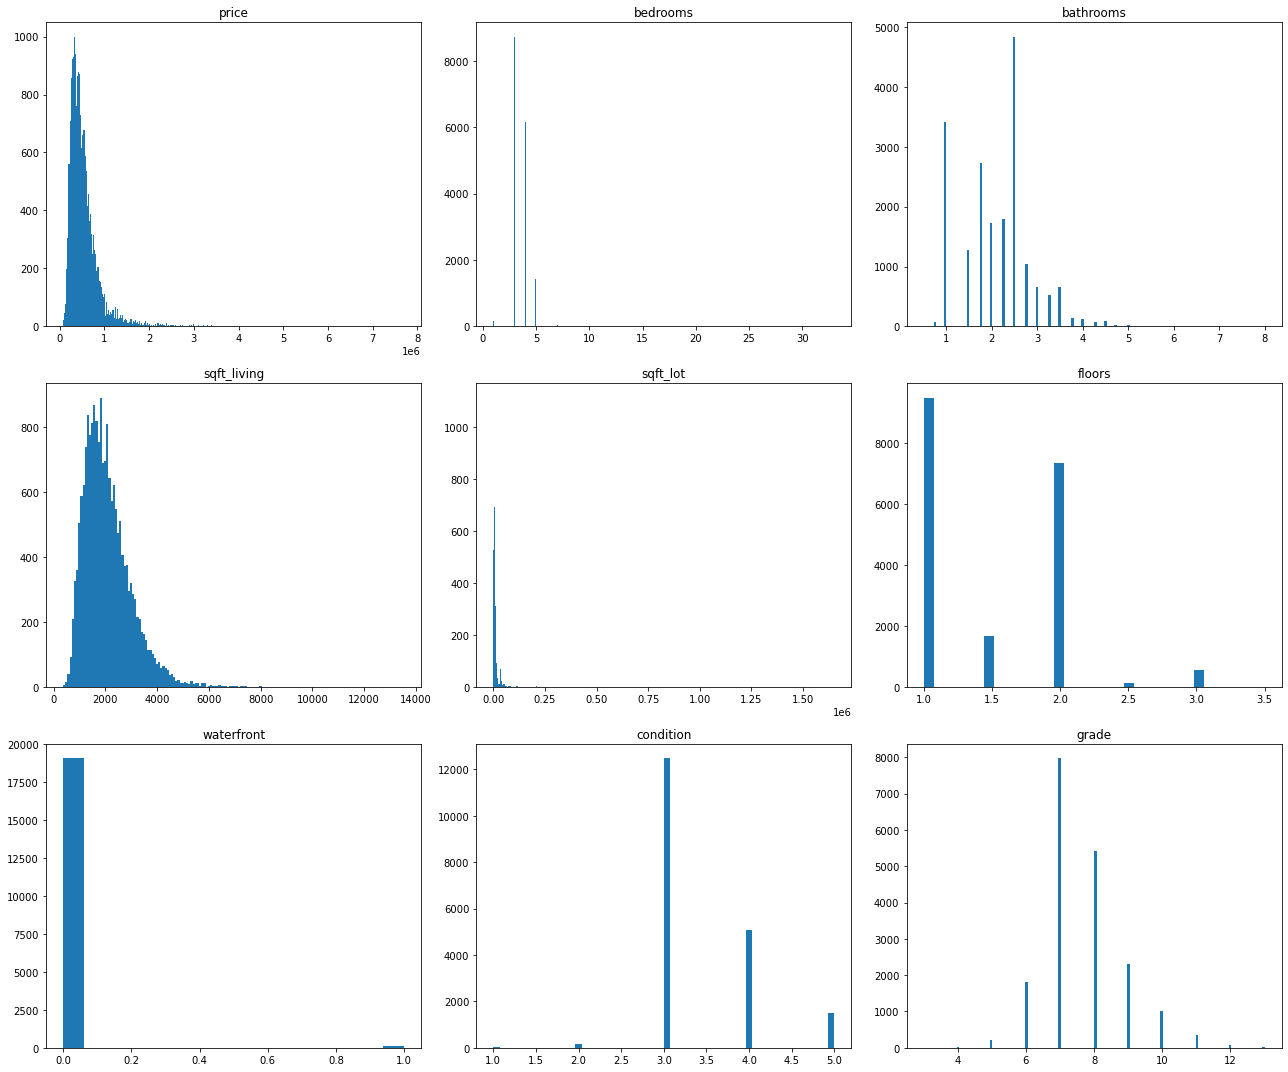

In [16]:
#checking on the distribution of our data
cat_data = df.loc[:, ((df.dtypes != 'object'))]

fig, axes = plt.subplots(nrows=(cat_data.shape[1] // 3), ncols=3, figsize=(18,15))

categoricals = [column for column in cat_data.columns if column != 'Id']

for col, ax in zip(categoricals, axes.flatten()):
    ax.hist(df[col].dropna(), bins='auto')
    ax.set_title(col)
    
fig.tight_layout()

### Interpretation 
As you can see that most of our variables are skewed, there is also a lot of zero's in 'waterfront', probably because  most of the houses have no waterfront feature.


## Modelling

In [17]:
test = pd.read_csv("data/kc_house_test.csv")

In [18]:
#dropping the following columns
test.drop(['id','date','view','sqft_above','sqft_basement','zipcode','lat','long','sqft_living15','sqft_lot15', 'yr_renovated'], axis=1, inplace=True)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  float64
 7   condition    21597 non-null  int64  
 8   grade        21597 non-null  int64  
 9   yr_built     21597 non-null  int64  
dtypes: float64(4), int64(6)
memory usage: 1.6 MB


In [19]:
#for preprocessing purposes lets select only rows with finite values in the 'waterfront' column 
test = test[np.isfinite(test['waterfront'])]
#converting it to integers
test.waterfront = test.waterfront.astype('int64')

In [20]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int64  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        19221 non-null  float64
 1   bedrooms     19221 non-null  int64  
 2   bathrooms    19221 non-null  float64
 3   sqft_living  19221 non-null  int64  
 4   sqft_lot     19221 non-null  int64  
 5   floors       19221 non-null  float64
 6   waterfront   19221 non-null  int64  
 7   condition    19221 non-null  int64  
 8   grade        19221 non-null  int64  
 9   yr_built     19221 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 1.6 MB


In [22]:
X_train = df.drop("price", axis=1)
y_train = df["price"]

X_test = test.drop("price", axis=1)
y_test = test["price"]

X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,3,2.25000,2570,7242,2.00000,0,3,7,1951
2,2,1.00000,770,10000,1.00000,0,3,6,1933
3,4,3.00000,1960,5000,1.00000,0,5,7,1965
4,3,2.00000,1680,8080,1.00000,0,3,8,1987
5,4,4.50000,5420,101930,1.00000,0,3,11,2001
...,...,...,...,...,...,...,...,...,...
21591,3,2.50000,1310,1294,2.00000,0,3,8,2008
21592,3,2.50000,1530,1131,3.00000,0,3,8,2009
21593,4,2.50000,2310,5813,2.00000,0,3,8,2014
21594,2,0.75000,1020,1350,2.00000,0,3,7,2009


In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19221 entries, 1 to 21596
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     19221 non-null  int64  
 1   bathrooms    19221 non-null  float64
 2   sqft_living  19221 non-null  int64  
 3   sqft_lot     19221 non-null  int64  
 4   floors       19221 non-null  float64
 5   waterfront   19221 non-null  int64  
 6   condition    19221 non-null  int64  
 7   grade        19221 non-null  int64  
 8   yr_built     19221 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 1.5 MB


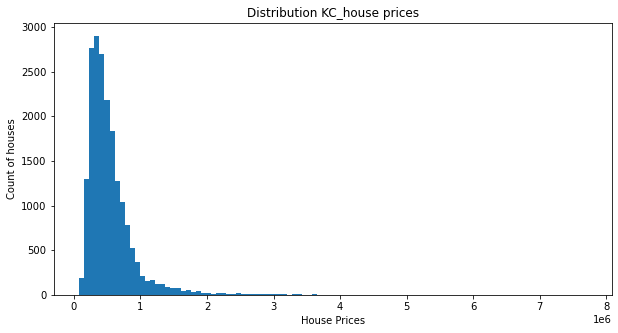

In [24]:
#A visualization of the distribution of the target variable:

fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("House Prices")
ax.set_ylabel("Count of houses")
ax.set_title("Distribution KC_house prices");


## Checking for Multicollinearity of Features
This is an important step. 

Multicollinearity occurs when predictor variables are highly correlated and can cause problems with the interpretation of regression coefficients and make it difficult to trust the results. 

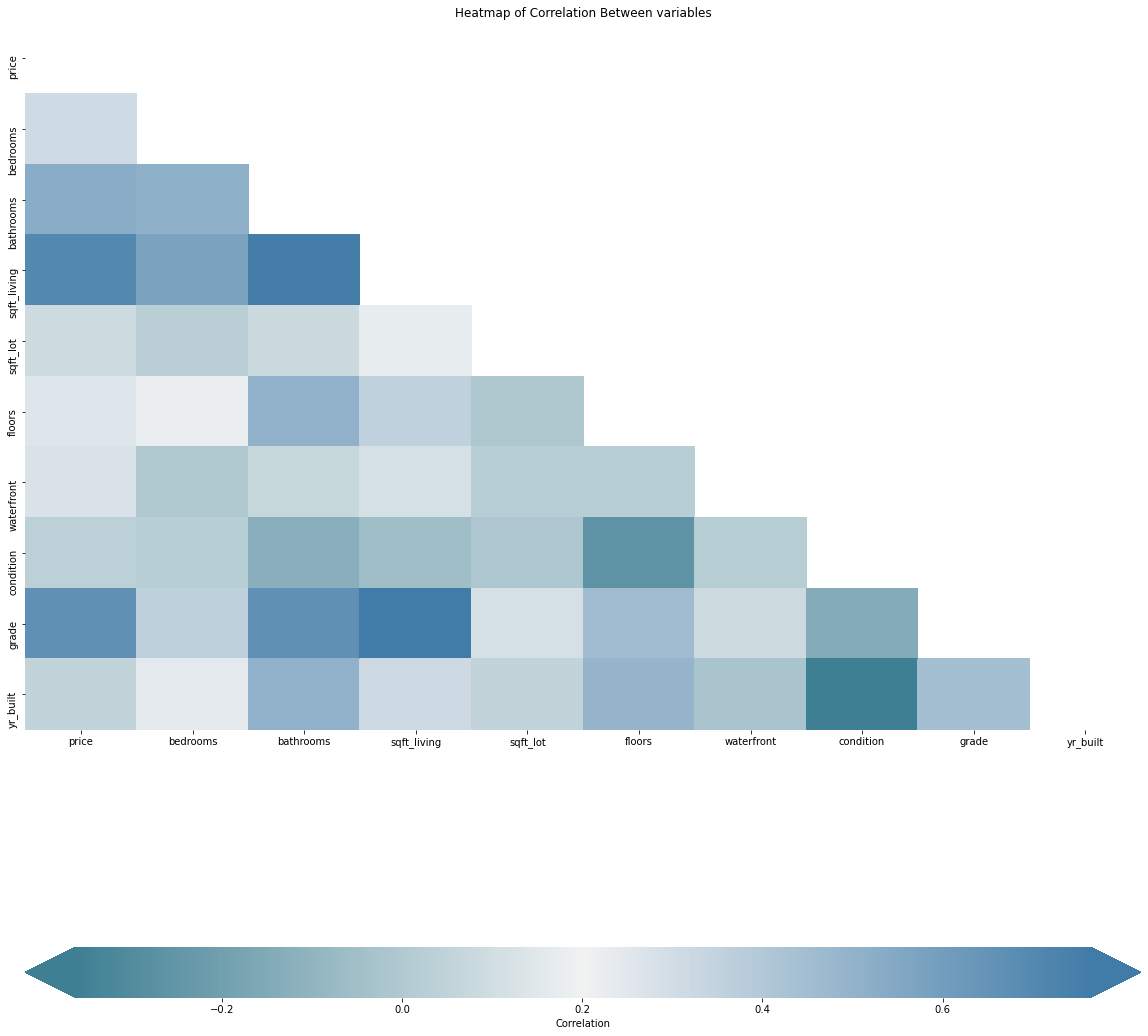

In [25]:
# Ploting a Correlation Heatmap to Build a Baseline Model

# compute the correlation matrix
corr = df.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(20, 20))

# for a custom diverging colormap
cmap = sns.diverging_palette(220, 600, as_cmap=True)

# Plotting a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    cmap=cmap,
    # Specifies that we want labels, not just colors
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between variables");

In [26]:
abs(df.corr())

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
price,1.00000,0.30965,0.52735,0.70465,0.08700,0.25828,0.27630,0.03804,0.66722,0.05352
bedrooms,0.30965,1.00000,0.51619,0.57821,0.02941,0.18240,0.00239,0.02506,0.36001,0.15751
bathrooms,0.52735,0.51619,1.00000,0.75634,0.08509,0.50621,0.06728,0.12643,0.66689,0.50701
sqft_living,0.70465,0.57821,0.75634,1.00000,0.17334,0.35718,0.11023,0.05747,0.76405,0.31744
sqft_lot,0.08700,0.02941,0.08509,0.17334,1.00000,0.00725,0.02314,0.01411,0.11458,0.05587
floors,0.25828,0.18240,0.50621,0.35718,0.00725,1.00000,0.02188,0.26349,0.45812,0.49025
waterfront,0.27630,0.00239,0.06728,0.11023,0.02314,0.02188,1.00000,0.01764,0.08738,0.02608
condition,0.03804,0.02506,0.12643,0.05747,0.01411,0.26349,0.01764,1.00000,0.14451,0.36198
grade,0.66722,0.36001,0.66689,0.76405,0.11458,0.45812,0.08738,0.14451,1.00000,0.44630
yr_built,0.05352,0.15751,0.50701,0.31744,0.05587,0.49025,0.02608,0.36198,0.44630,1.00000


In [27]:
most_correlated_feature = "sqft_living"

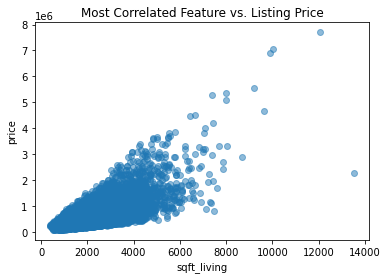

In [28]:

fig, ax = plt.subplots()

ax.scatter(X_train[most_correlated_feature], y_train, alpha=0.5)
ax.set_xlabel(most_correlated_feature)
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs. Listing Price");

# Preparing kc_house_data  Dataset for Modeling

In [29]:
from sklearn.linear_model import LinearRegression

baseline_model = LinearRegression()

> We will evaluate our model using cross-validation and ShuffleSplit, I will perform three separate train-test which splits on the training data, and then find the train and test scores for each split. This allows us to see how well our model is performing on different subsets of the training data, and helps avoid overfitting your model to a particular set of training data.

In [30]:
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[[most_correlated_feature]],
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.49726922292024245
Validation score: 0.4938823233217529


### Interpretation

 * Our train score of 0.497 and a validation score of 0.494 suggest that the model is not able to accurately predict the target variable for the training data or for new data. 
 * This could be due to a number of factors, including a lack of sufficient data or features, a poor model architecture.

In [31]:
X_train_numeric = X_train.select_dtypes("number").copy()

X_train_numeric

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
1,3,2.25000,2570,7242,2.00000,0,3,7,1951
2,2,1.00000,770,10000,1.00000,0,3,6,1933
3,4,3.00000,1960,5000,1.00000,0,5,7,1965
4,3,2.00000,1680,8080,1.00000,0,3,8,1987
5,4,4.50000,5420,101930,1.00000,0,3,11,2001
...,...,...,...,...,...,...,...,...,...
21591,3,2.50000,1310,1294,2.00000,0,3,8,2008
21592,3,2.50000,1530,1131,3.00000,0,3,8,2009
21593,4,2.50000,2310,5813,2.00000,0,3,8,2014
21594,2,0.75000,1020,1350,2.00000,0,3,7,2009


IndexError: index 2 is out of bounds for axis 0 with size 2

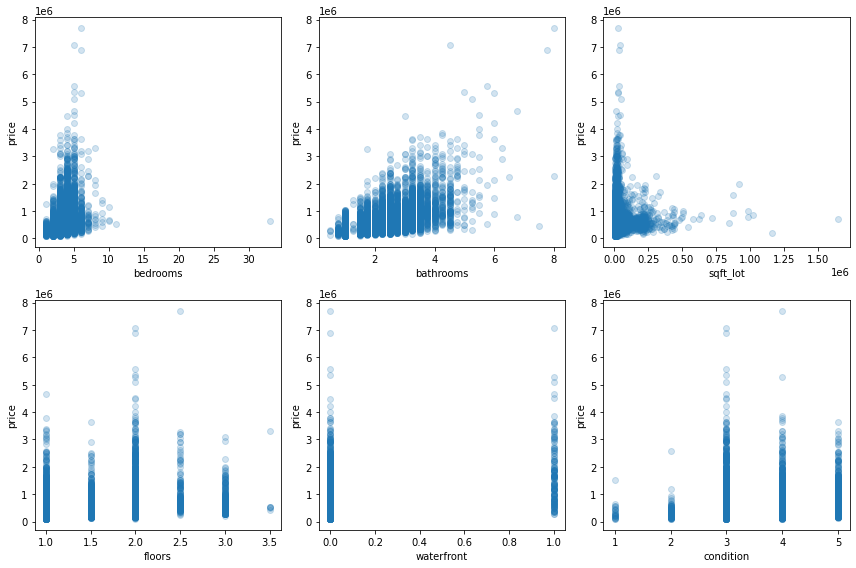

In [32]:
##Lets check on the relationship between the target variable and all numeric features except for sqft_living 
scatterplot_data = X_train_numeric.drop("sqft_living", axis=1)

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(12, 8))
fig.set_tight_layout(True)

for index, col in enumerate(scatterplot_data.columns):
    ax = axes[index//3][index%3]
    ax.scatter(X_train_numeric[col], y_train, alpha=0.2)
    ax.set_xlabel(col)
    ax.set_ylabel("price")

### Interpretation
* Most of the features have a lot of outliers in this data set 
* Seems like most of the features have a relationship with price apart from waterfront.
* As per the condition plot it shows that houses with condition 3 and 4 have higher prices than house with condition 5 which is surprising, if provided with more data it is something interesting that we can analyse. 

In [33]:
X_train_second_model = X_train_numeric.drop(["waterfront", "condition", "floors"], axis=1).copy()

X_train_second_model

,bedrooms,bathrooms,sqft_living,sqft_lot,grade,yr_built
1,3,2.25000,2570,7242,7,1951
2,2,1.00000,770,10000,6,1933
3,4,3.00000,1960,5000,7,1965
4,3,2.00000,1680,8080,8,1987
5,4,4.50000,5420,101930,11,2001
...,...,...,...,...,...,...
21591,3,2.50000,1310,1294,8,2008
21592,3,2.50000,1530,1131,8,2009
21593,4,2.50000,2310,5813,8,2014
21594,2,0.75000,1020,1350,7,2009


In [34]:
## Evaluating second model

second_model = LinearRegression()

second_model_scores = cross_validate(
    estimator=second_model,
    X=X_train_second_model,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.6173224805440678
Validation score: 0.6190125161080036

Baseline Model
Train score:      0.49726922292024245
Validation score: 0.4938823233217529


### Interpretation
* Our second model got better scores on the training and validation score, 
* It has slightly improved the model's ability to understand the underlying patterns in the data

In [35]:
#checking for Multicollinearity

import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train_second_model)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.618
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     5177.
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        22:45:24   Log-Likelihood:            -2.6458e+05
No. Observations:               19221   AIC:                         5.292e+05
Df Residuals:                   19214   BIC:                         5.292e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        7.254e+06   1.31e+05     55.543      0.000       7e+06    7.51e+06
bedrooms    -5.064e+04   2269.458    -22.315      0.000   -5.51e+04   -4.62e+04
bathrooms    5.898e+04   3743.110     15.757      0.000    5.16e+04    6.63e+04
sqft_living   192.1130      3.650     52.641      0.000     184.960     199.266
sqft_lot       -0.2894      0.042     -6.961      0.000      -0.371      -0.208
grade        1.315e+05   2364.244     55.628      0.000    1.27e+05    1.36e+05
yr_built    -4094.2958     68.804    -59.507      0.000   -4229.157   -3959.435
==============================================================================
Omnibus:                    15385.593   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1066268.013
Skew:                           3.350   Prob(JB):                         0.00
Kurtosis:                      38.868   Cond. No.                     3.42e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.42e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The condition number of 3.42e+06 is above 30  and indicates strong multicollinearity.

## Final Model

In [36]:
best_features = ["bedrooms", "bathrooms", "sqft_living","sqft_lot", "grade","yr_built"]

In [37]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [38]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.6178438276433443

In [39]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, final_model.predict(X_test_final), squared=False)

230113.05938349862

### Interpretation
This means that for an average house, this algorithm will be off by about $230,113. 

It would be a good idea for a human to review and adjust the prices of the house rather than relying solely on an algorithm, since the average selling price is $540,296.

## Investigating Linearity

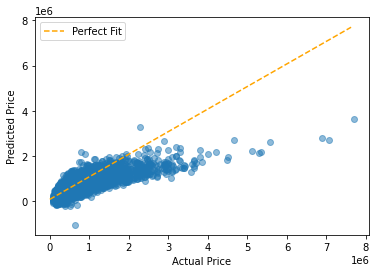

In [40]:
preds = final_model.predict(X_test_final)
fig, ax = plt.subplots()

perfect_line = np.arange(y_test.min(), y_test.max())
ax.plot(perfect_line, linestyle="--", color="orange", label="Perfect Fit")
ax.scatter(y_test, preds, alpha=0.5)
ax.set_xlabel("Actual Price")
ax.set_ylabel("Predicted Price")
ax.legend();

### Interpretation
* Our data has alot of outliers that are not following the general trend of the data, but overall the data appears to have a linear relationship. 

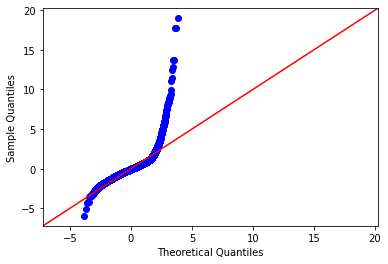

In [41]:
#Now let's check whether the normality assumption holds for our model.
import scipy.stats as stats
residuals = (y_test - preds)
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True);

The outliers are causing problems and are likely impacting the normality of the data

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = [variance_inflation_factor(X_train_final.values, i) for i in range(X_train_final.shape[1])]
pd.Series(vif, index=X_train_final.columns, name="Variance Inflation Factor")

bedrooms       22.62463
bathrooms      21.64856
sqft_living    24.50844
sqft_lot        1.18647
grade         118.64360
yr_built       84.66601
Name: Variance Inflation Factor, dtype: float64

* We have above 5 for all features in the final model apart from the sqft_lot 
* This means the multicollinearity is too high

### Investigating Homoscedasticity


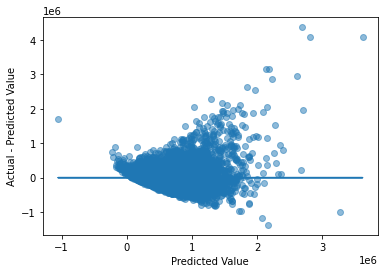

In [43]:
fig, ax = plt.subplots()

ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
ax.set_xlabel("Predicted Value")
ax.set_ylabel("Actual - Predicted Value");

### Interpretation

The homoscedasticity assumption is that the spread or dispersion of the data is equal for all values of the independent variable.

This data violates the homoscedasticity assumption, this shown by the residuals clustering around certain values of the independent variable

More analysis is needed to be done to transform the data or use a different statistical test in order to properly analyze the data. 

